In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
DATASET = "train"
DATASET2 = "valid"

CATEGORIES = ["Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___healthy", "Tomato___Late_blight",
              "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite",
              "Tomato___Target_Spot", "Tomato___Tomato_mosaic_virus", "Tomato___Tomato_Yellow_Leaf_Curl_Virus"]


In [3]:
train_data = []

for category in CATEGORIES:
    label = CATEGORIES.index(category)
    path = os.path.join(DATASET, category)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (64, 64))
        train_data.append([img, label])


In [4]:
test_data = []

for category in CATEGORIES:
    label = CATEGORIES.index(category)
    path = os.path.join(DATASET2, category)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (64, 64))
        test_data.append([img, label])


In [5]:
print(len(train_data))
print(len(test_data))


18345
4585


In [6]:
import random

random.shuffle(train_data)
random.shuffle(test_data)


In [7]:
X_train = []
y_train = []

for features, label in train_data:
    X_train.append(features)
    y_train.append(label)


In [8]:
Y = []
for i in y_train:
    if i == 0:
        Y.append("BACTERIAL SPOT")
    elif i == 1:
        Y.append("EARLY BLIGHT")
    elif i == 2:
        Y.append("HEALTHY")
    elif i == 3:
        Y.append("LATE BLIGHT")
    elif i == 4:
        Y.append("LEAF MOLD")
    elif i == 5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i == 6:
        Y.append("SPIDER MITE")
    elif i == 7:
        Y.append("TARGET SPOT")
    elif i == 8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train), len(y_train)

(18345, 18345)

In [9]:
X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

Z = []
for i in y_test:
    if i == 0:
        Z.append("BACTERIAL SPOT")
    elif i == 1:
        Z.append("EARLY BLIGHT")
    elif i == 2:
        Z.append("HEALTHY")
    elif i == 3:
        Z.append("LATE BLIGHT")
    elif i == 4:
        Z.append("LEAF MOLD")
    elif i == 5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i == 6:
        Z.append("SPIDER MITE")
    elif i == 7:
        Z.append("TARGET SPOT")
    elif i == 8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test), len(y_test)

(4585, 4585)

In [10]:
X_train = np.array(X_train).reshape(-1, 64, 64, 3)
X_train = X_train / 255.0

X_test = np.array(X_test).reshape(-1, 64, 64, 3)
X_test = X_test / 255.0


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_32440\3197273283.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_32440\3197273283.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


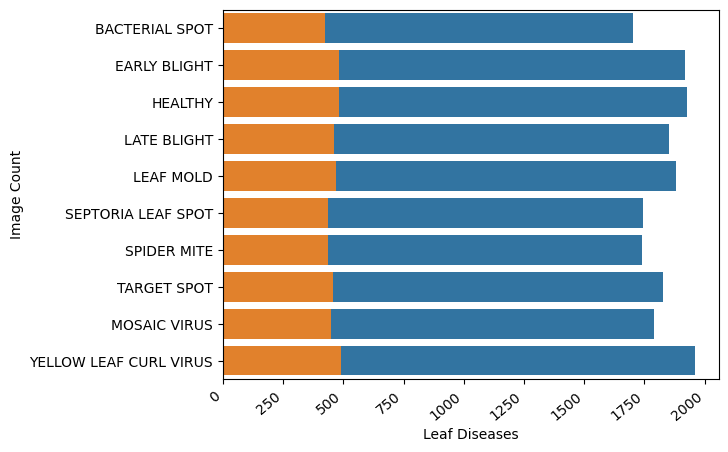

In [11]:
order = ['BACTERIAL SPOT', 'EARLY BLIGHT', 'HEALTHY', 'LATE BLIGHT', 'LEAF MOLD', 'SEPTORIA LEAF SPOT', 'SPIDER MITE',
         'TARGET SPOT', 'MOSAIC VIRUS', 'YELLOW LEAF CURL VIRUS']

ax = sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

ax = sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count");

In [12]:
from keras.utils import to_categorical

one_hot_train = to_categorical(y_train)
one_hot_test = to_categorical(y_test)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()


D:\Programming\ML\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,450 (1.55 MB)

 Trainable params: 405,450 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hist = classifier.fit(X_train, one_hot_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 51s 362ms/step - accuracy: 0.1920 - loss: 2.1176 - val_accuracy: 0.5609 - val_loss: 1.3437
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 348ms/step - accuracy: 0.5692 - loss: 1.2239 - val_accuracy: 0.7054 - val_loss: 0.8513
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 349ms/step - accuracy: 0.7246 - loss: 0.7796 - val_accuracy: 0.7980 - val_loss: 0.5935
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 365ms/step - accuracy: 0.7817 - loss: 0.6199 - val_accuracy: 0.8351 - val_loss: 0.4869
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 45s 394ms/step - accuracy: 0.8227 - loss: 0.4952 - val_accuracy: 0.8504 - val_loss: 0.4454
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 354ms/step - accuracy: 0.8414 - loss: 0.4613 - val_accuracy: 0.8231 - val_loss: 0.5120
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 343ms/step - accuracy: 0.8556 - loss: 0.4085 - val_accuracy: 0.8411 - val_loss: 0.4469
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 337ms/step - accuracy: 0.8743 - loss: 0

In [15]:
test_loss, test_acc = classifier.evaluate(X_test, one_hot_test)
test_loss, test_acc

144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9404 - loss: 0.1711


(0.17072483897209167, 0.9413304328918457)

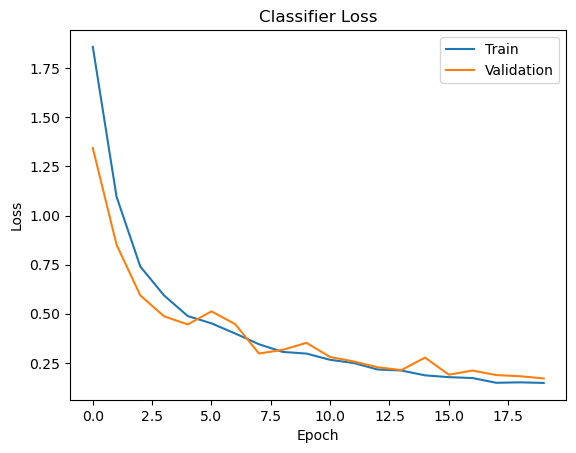

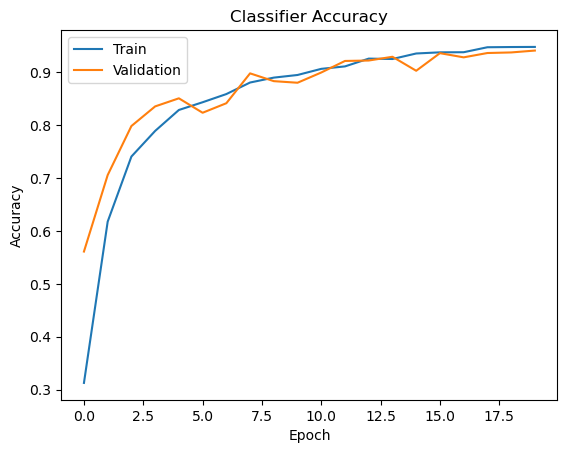

In [16]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [20]:
import numpy as np

# Get predicted probabilities or logits
y_pred = classifier.predict(X_test)

# Convert probabilities/logits to class predictions (assuming you're doing classification)
y_pred_classes = np.argmax(y_pred, axis=1)

144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


In [23]:
y_prob = classifier.predict(X_test)
y_pred_classes = np.argmax(y_prob, axis=1)

144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


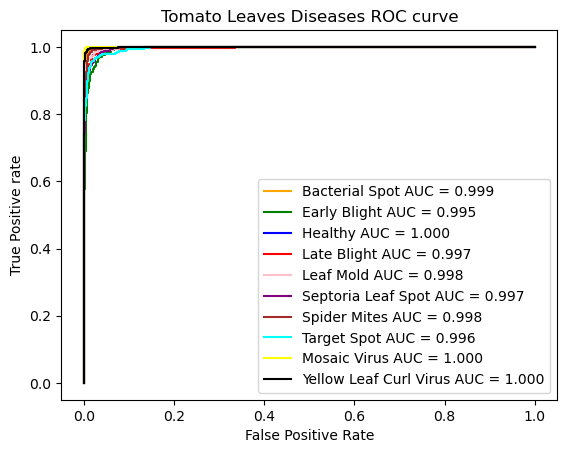

In [24]:

from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

n_class = 10

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], color='orange', label='Bacterial Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green', label='Early Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', label='Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red', label='Late Blight AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink', label='Leaf Mold AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple', label='Septoria Leaf Spot AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown', label='Spider Mites AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan', label='Target Spot AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow', label='Mosaic Virus AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black', label='Yellow Leaf Curl Virus AUC = %0.3f' % roc_auc[9])
plt.title('Tomato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


In [25]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets